In [2]:

import os
print("只使用CPU")
# 省点显存，避免影响线上业务
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
# gpuids = [0]
# gpus = tf.config.experimental.list_physical_devices('GPU')
# print("gpus", gpus)

# gpu_list = list()
# for gpu_index in gpuids:
#     gpu_list.append(gpus[gpu_index])
# tf.config.experimental.set_visible_devices(gpu_list, 'GPU')
# for gpu_index in gpuids:
#     tf.config.experimental.set_memory_growth(gpus[gpu_index], True)
# logical_gpus = tf.config.experimental.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

只使用CPU


# 数据加载

In [3]:
import sys  
sys.path.insert(0, '/data/projects/BGMcloak')

In [15]:
import librosa
from config import dataset_path, pretrain_ae_path, epochs, lr
from data_process.get_date import get_dataset
import numpy as np
from matplotlib import pyplot as plt
import os
import soundfile as sf
import librosa.display

In [5]:
# 加载数据
X, Y = get_dataset(dataset_path)

['/data1/dataset/audio/bgm_pkl/Babyface-With Him.wav.pkl', '/data1/dataset/audio/bgm_pkl/SZA - Good Days.wav.pkl', "/data1/dataset/audio/bgm_pkl/Chris Lane-I Don't Know About You.wav.pkl"]
(512, 229, 1)


# 预训练模型可视化

In [6]:
assert os.path.exists(pretrain_ae_path)

In [7]:
from tensorflow.keras.models import load_model
# 检查推理结果
model = load_model(pretrain_ae_path)

2022-03-24 10:18:53.585420: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-24 10:18:53.585527: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: gpu-p100-m2
2022-03-24 10:18:53.585543: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: gpu-p100-m2
2022-03-24 10:18:53.585773: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 450.80.2
2022-03-24 10:18:53.585829: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 450.80.2
2022-03-24 10:18:53.585841: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 450.80.2
2022-03-24 10:18:53.586482: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructio

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 229, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 229, 64)      1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 229, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 512, 229, 32)      18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 512, 229, 2)       578       
                                                                 
 conv2d_4 (Conv2D)           (None, 512, 229, 1)       19        
                                                                 
Total params: 57,653
Trainable params: 57,653
Non-trainable p

In [9]:
test_input = np.array([X[0]])
predict = model.predict(test_input)

In [10]:
print(predict.shape)
# predict[0]

(1, 512, 229, 1)


In [11]:
sr=16000

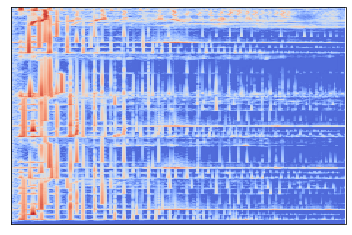

In [19]:
test_data = np.squeeze(predict[0])
librosa.display.specshow(test_data, sr=sr)
plt.show()

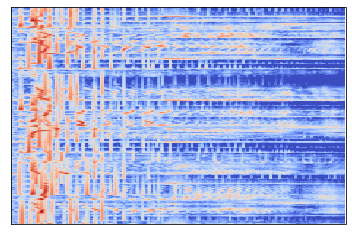

In [33]:
librosa.display.specshow(np.squeeze(X[2]), sr=sr)
plt.show()

In [23]:
def reverse_predict(predict):
    spec = librosa.db_to_power(predict)
    mel = spec.T
    return mel

In [40]:
# 较短音频无法播放，因此拼接音频测试
count = 10
mel_list = list()
for i in range(count):
    mel_list.append(reverse_predict(np.squeeze(X[0])))

In [41]:
# 拼接音频
concate_data = np.concatenate(mel_list, axis=1)
concate_data.shape

(229, 5120)

In [42]:
audio_name = "concat.wav"
sf.write(audio_name, ori_data, samplerate)

In [43]:
ipd.display.Audio(audio_name)

In [29]:
ori_data = reverse_predict(np.squeeze(X[0]))

In [36]:
ori_data.shape

(229, 512)

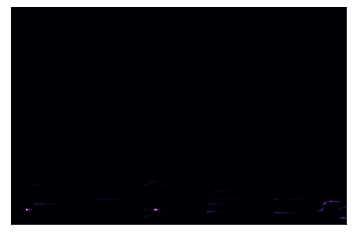

In [30]:
librosa.display.specshow(ori_data, sr=sr)
plt.show()

In [46]:
sr=sr
hop_length=512
fmin=30.0
n_mels=229
htk=True

In [48]:
SR=16000

In [51]:
def mel_to_audio(fn, sr=SR, hop_length=512, fmin=30.0, n_mels=229, htk=True, spec_log_amplitude=True):
    mel = fn
    audio = librosa.feature.inverse.mel_to_audio(
    mel,
    sr=sr,
    hop_length=hop_length,
    fmin=fmin,
#         n_mels=n_mels,
    htk=htk)
    return audio

In [52]:

audio = mel_to_audio(ori_data)
sf.write('ori_data.wav', audio, samplerate)
ipd.display.Audio("ori_data.wav")

In [24]:
raw_mel = reverse_predict(np.squeeze(predict[0]))

In [53]:
audio = mel_to_audio(raw_mel)
sf.write('stereo_file.wav', audio, samplerate)
ipd.display.Audio("stereo_file.wav")


# cloak模型可视化测试

In [3]:
import sys  
sys.path.insert(0, '/data/projects/BGMcloak')
import os

print("只使用CPU")
# 省点显存，避免影响线上业务
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    
    
from tensorflow.keras.models import load_model
from config import dataset_path, pretrain_ae_path, epochs, lr, cloak_model_path
from data_process.get_date import get_dataset
import numpy as np
from matplotlib import pyplot as plt
import os

只使用CPU


In [7]:
# 加载数据
X, Y = get_dataset(dataset_path)

['/data/dataset/audio_test/BGM_resized/37.jpg', '/data/dataset/audio_test/BGM_resized/24.jpg', '/data/dataset/audio_test/BGM_resized/19.jpg']
(256, 512, 3)


In [8]:
assert os.path.exists(cloak_model_path)
model = load_model(cloak_model_path, compile=False)

In [9]:
test_input = np.array([X[0]])
predict = model.predict(test_input)
print(predict.shape)

(1, 256, 512, 3)


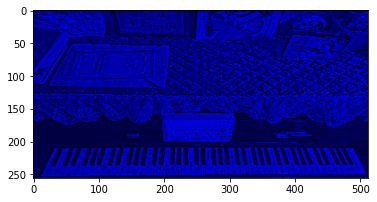

In [10]:
plt.imshow(predict[0])
plt.show()

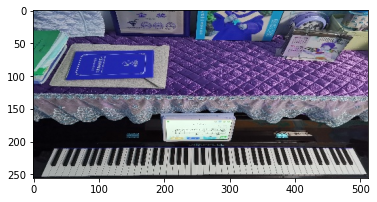

In [11]:
plt.imshow(Y[0])
plt.show()

In [ ]:
pid = os.getpid()
!kill -9 $pid

# flatten测试

In [57]:
arr1=np.arange(24).reshape(2, 3,4)
arr1

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [59]:
arr1[0].flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [60]:
arr1.reshape(2, -1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

In [61]:
16 * 512 / 8 

1024.0